<a href="https://colab.research.google.com/github/tamaravera14/SIMULACI-N-I/blob/main/Actividad10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 10**
---

***Bazaldua Vera Tamara Alheli***

---

**Problema:** Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30] (minutos).
Determínese la probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10 minutos.

Analíticamente:

Sabemos que hay dos casos, paso uno o pasa otro.
1. La persona uno llega antes que la persona dos y la diferencia de tiempos es menor igual a 10 minutos.
$$P[(p_1 > p_2) \cap (p_1 - p_2 \preceq 10)]$$
2. La persona uno llega antes que la persona dos y la diferencia de tiempos es menor igual a 10 minutos.
$$P[(p_2 > p_1) \cap (p_2 - p_1 \preceq 10)]$$

De modo que:

$$P([(p_1 > p_2) \cap (p_1 - p_2 \preceq 10)] \cup [(p_2 > p_1) \cap (p_2 - p_1 \preceq 10)]) = \frac{5}{9}$$

Simulación:

In [2]:
from random import uniform
import numpy as np
import matplotlib.pyplot as plt
import statistics as st

In [3]:
mu = 5/9

In [20]:
def personas(n):
  lista = []
  cuenta = 0
  for i in range(n):
      x = uniform(0, 30) # Tomamos la distribución uniforme ya que ambos tienen la misma probabilidad de llegada
      y = uniform(0, 30)
      if abs(x - y) <= 10:  # Hacemos la diferencias de tiempos para que como máximo sean 10 minutos
          cuenta += 1
  prom = (cuenta / n)  # Calculamos la probabilidad
  lista.append(prom)
  return lista

In [21]:
def muestra(M):
  lista = []
  for i in range(1,M):
    e = personas(i)        # Repetimos el experimento M veces, para generar una muestra
    lista.append(e)           # Almacenamos en una lista la muestra obtenida
  return lista

In [25]:
n = 10000
prob = muestra(n)

In [26]:
des = np.std(prob)
mu_cal = np.mean(prob)
E = 1.96*np.sqrt(mu*(1-mu)/n)

In [27]:
print("Media estimada: ", mu_cal)
print("Media exacta: ", mu)
print("Error de media con respecto a la real:", abs(mu-mu_cal))

Media estimada:  0.5555863197086007
Media exacta:  0.5555555555555556
Error de media con respecto a la real: 3.076415304514857e-05


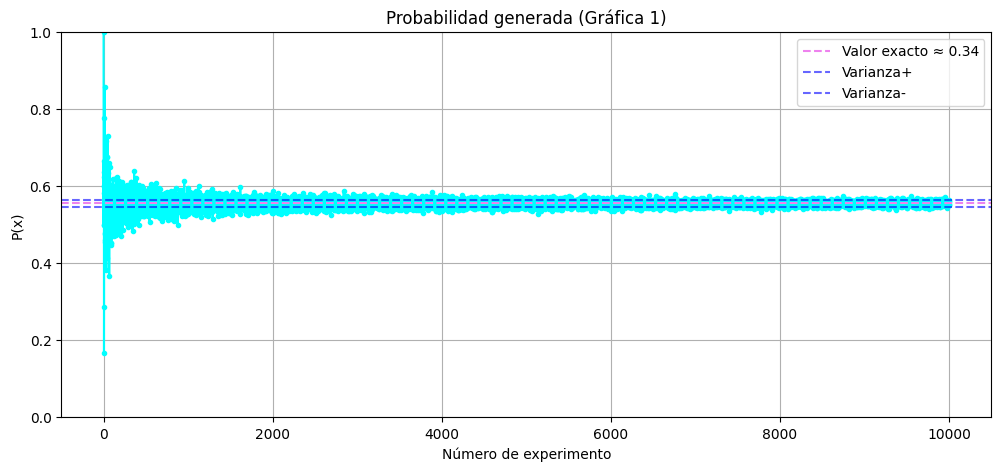

In [34]:
# Gráfico
plt.figure(figsize=(12, 5))
plt.plot(prob, marker='o', markersize=3, linestyle='-', color = "cyan")
plt.axhline(mu, color='violet', linestyle='--', label="Valor exacto ≈ 0.34")
plt.axhline(mu + E, color='blue', linestyle='--', label="Varianza+", alpha=0.6)
plt.axhline(mu - E, color='blue', linestyle='--', label="Varianza-", alpha=0.6)
plt.ylim(0, 1)
plt.title("Probabilidad generada (Gráfica 1)")
plt.xlabel("Número de experimento")
plt.ylabel("P(x)")
plt.legend()
plt.grid(True)
plt.show()

In [35]:
from scipy.stats import norm
# Nivel de confianza
confianza = 0.95

# Cálculo de z_{α/2}
alpha = 1 - confianza
z_alpha_2 = norm.ppf(1 - alpha / 2)

print("z_{{α/2}} para un ",confianza*100,"% de confianza es: ",round(z_alpha_2, 4))

z_{{α/2}} para un  95.0 % de confianza es:  1.96


In [36]:
niv_confianza = abs((2 * des * z_alpha_2) / np.sqrt(n))
print("El nivel de confianza es: ",niv_confianza)
print("El intervalo de confianza es: [",mu - niv_confianza/2,",",mu + niv_confianza/2,"]")

El nivel de confianza es:  0.0005686395335519932
El intervalo de confianza es: [ 0.5552712357887796 , 0.5558398753223316 ]


### **Resultados de la simulación**

Notemos que la  probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10 minutos por simulación es de 0.5555863197086007, en comparacion con la probabilidad exacta que es de 0.5555555555555556, con un nivel de confianza de 95% en un intervalo de confianza de [0.552712357887796 , 0.5558398753223316].